In [1]:
import matplotlib.pyplot as plt
import neurolib.utils.functions as func
from petTOAD_setup import *
import scipy.io as sio
import csv

Getting the layout...
Done with the layout...
Subj-ADNI002S0413 has some ROI with only 0s...
Subj-ADNI002S1155 has some ROI with only 0s...
Subj-ADNI011S6367 has some ROI with only 0s...
Subj-ADNI013S2389 has some ROI with only 0s...
Subj-ADNI013S4580 has some ROI with only 0s...
Subj-ADNI014S6424 has some ROI with only 0s...
Subj-ADNI014S6765 has some ROI with only 0s...
Subj-ADNI014S7072 has some ROI with only 0s...
Subj-ADNI019S6635 has some ROI with only 0s...
Subj-ADNI027S6577 has some ROI with only 0s...
Subj-ADNI037S6031 has some ROI with only 0s...
Subj-ADNI041S6785 has some ROI with only 0s...
Subj-ADNI053S6598 has some ROI with only 0s...
Subj-ADNI070S6191 has some ROI with only 0s...
Subj-ADNI098S6362 has some ROI with only 0s...
Subj-ADNI116S4199 has some ROI with only 0s...
Subj-ADNI116S6129 has some ROI with only 0s...
Subj-ADNI127S6348 has some ROI with only 0s...
Subj-ADNI129S6228 has some ROI with only 0s...
Subj-ADNI168S6591 has some ROI with only 0s...
filtPowSpectra

In [2]:
# This is a sublist of label of the cortical regions that were included in the paper by Demirtas et al. - AAL atlas (78 regions, excluding infratentorial and deep)
with open ('/mnt/e/ADNI/ADNI_Hopf/Utils/aal_regions_included.csv', newline='') as g:
    new_reader = csv.reader(g)
    included_regions = list(new_reader)
g.close()

# Get the AAL atlas labels
import nilearn.datasets as datasets
aal = datasets.fetch_atlas_aal()
labels = np.array(aal.labels)
# create an array with the indices of each label (note that these are not the label number from the nifti image)
indices = np.array([i for i in enumerate(labels)])
SC_regions_index = np.isin(labels, included_regions)
# filter the indices that we want based on the position so to have a final SC matrix only for the regions we considered.
SC_78_regions_aal_atlas = indices[SC_regions_index]
filter_SC = np.array([int(i) for i in SC_78_regions_aal_atlas[:,0]])

# Set file path for SC matrix
x_path = '/mnt/e/ADNI/ADNI_Hopf/Utils/'
# Load structural connectivity matrix and use it as parameter in Hopf model
xfile = 'SCmatrices88healthy.mat' 
M = sio.loadmat(x_path + xfile); 
mat = M['SCmatrices']
# averaging the SC among subjects
mat0 = np.mean(mat,axis = 0)
# Filter the SC to have just the 78 regions we considered
x_mat0 = mat0[filter_SC]
new_mat0 = x_mat0.T[filter_SC]
# Prevent full synchronization of the model
AAL_sc_norm = new_mat0 * 0.2 / new_mat0.max() 
np.fill_diagonal(AAL_sc_norm,0)
ts = np.load('/mnt/e/ADNI/ADNI_Hopf/Results/timeseries_HC.npy')
AAL_fcs = []
for i in range(ts.shape[0]):
    AAL_fcs.append(func.fc(ts[i]))
AAL_avg_fc = np.array(AAL_fcs).mean(axis = 0)

In [8]:
def plot_sc_fc(sc, fc, atlas_name):
    fig = plt.figure()
    plt.subplot(121)
    plt.title('SC matrix')
    plt.imshow(sc)
    plt.subplot(122)
    plt.title('FC matrix')
    plt.imshow(fc)
    fig.suptitle(f'{atlas_name}\nSC-FC correlation')
    fig.tight_layout()
    fig.subplots_adjust(top=1.1)
    txt=f"Average SC-FC correlation is: {round(func.matrix_correlation(sc, fc), 3)}"
    plt.figtext(0.5, 0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

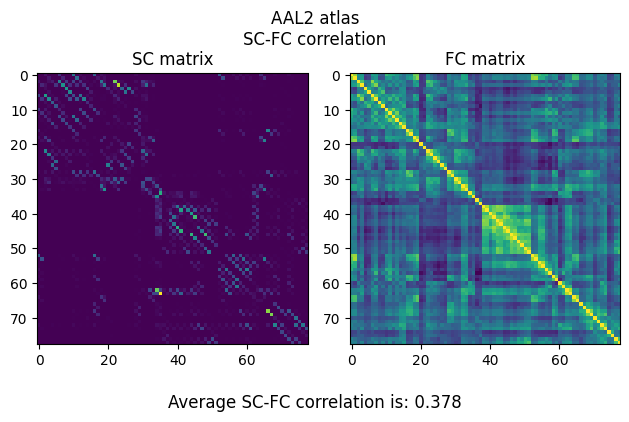

In [9]:
plot_sc_fc(AAL_sc_norm, AAL_avg_fc, 'AAL2 atlas')

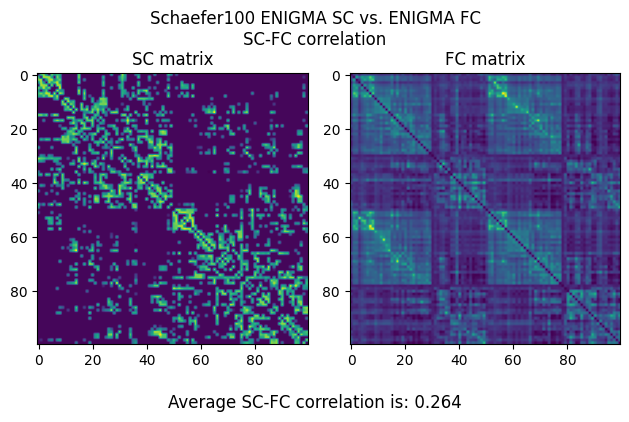

In [102]:
sc_enigma_100 = np.loadtxt(UTL_DIR / "enigma_sc_schaefer_100.csv", delimiter=",")
fc_enigma_100 = np.loadtxt(UTL_DIR / "enigma_fc_schaefer_100.csv", delimiter=",")
plot_sc_fc(sc_enigma_100, fc_enigma_100, "Schaefer100 ENIGMA SC vs. ENIGMA FC")

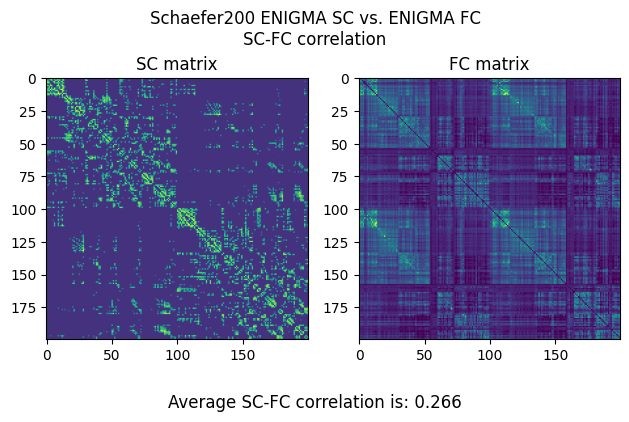

In [96]:
sc_enigma_200 = np.loadtxt(UTL_DIR / "enigma_sc_schaefer_200.csv", delimiter=",")
fc_enigma_200 = np.loadtxt(UTL_DIR / "enigma_fc_schaefer_200.csv", delimiter=",")
plot_sc_fc(sc_enigma_200, fc_enigma_200, "Schaefer200 ENIGMA SC vs. ENIGMA FC")

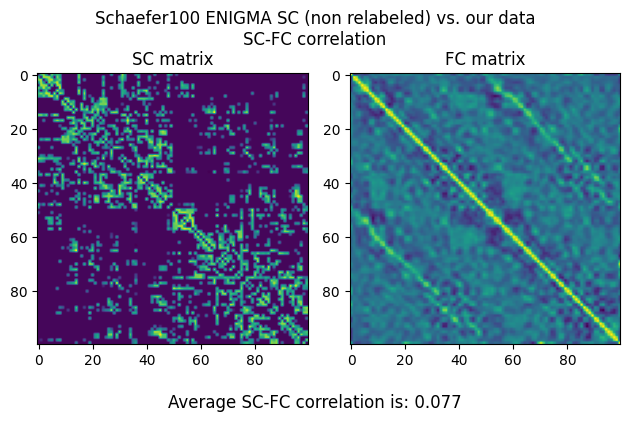

In [97]:
group_name = 'HC'
RES_DIR_GROUP = RES_DIR / group_name
group_fc = sio.loadmat(RES_DIR_GROUP / f"avg_FC.mat")
avg_fc_100 = group_fc['avg_fc']
plot_sc_fc(sc_enigma_100, avg_fc_100, "Schaefer100 ENIGMA SC (non relabeled) vs. our data")

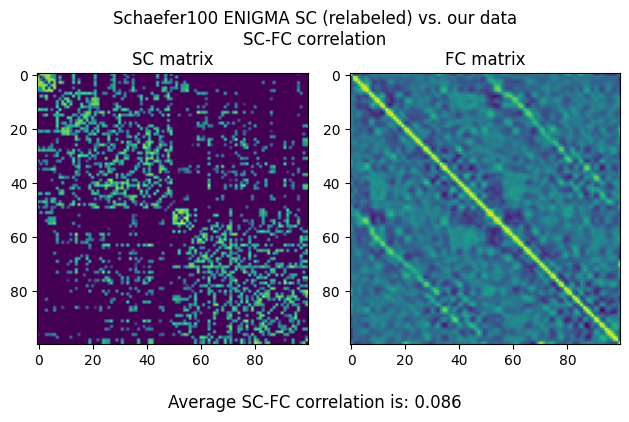

In [98]:
sc_enigma_100_relab = get_sc_enigma100(relabeled=True)
plot_sc_fc(sc_enigma_100_relab, avg_fc_100, "Schaefer100 ENIGMA SC (relabeled) vs. our data")

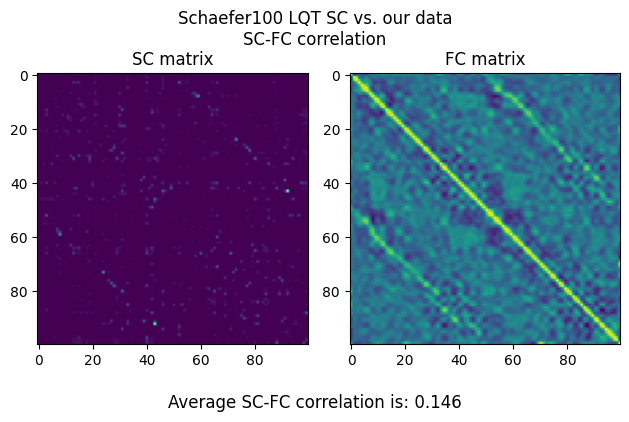

In [33]:
lqt_sc_100 = get_sc()
plot_sc_fc(lqt_sc_100, avg_fc_100, "Schaefer100 LQT SC vs. our data")

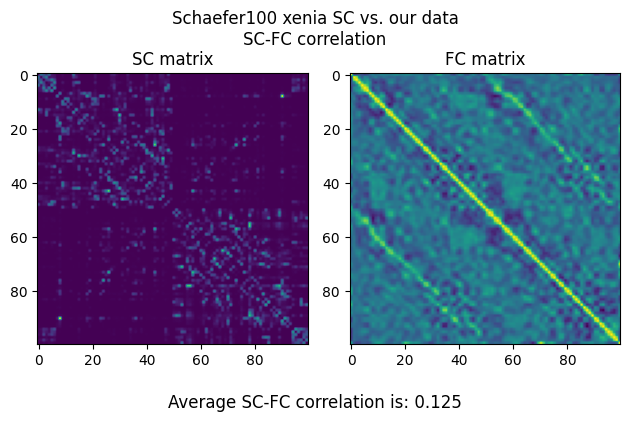

In [48]:
mat_schaefer100 = sio.loadmat(UTL_DIR / 'xenia_schaefer100.mat')
sc_x_schaefer100 = mat_schaefer100['mat_zero']
plot_sc_fc(sc_x_schaefer100, avg_fc_100, "Schaefer100 xenia SC vs. our data")

In [78]:
def matrixflip(m,d):
    tempm = m.copy()
    if d=='h':
        for i in range(0,len(tempm),1):
            np.flip(tempm[i])
    elif d=='v':
        np.flip(tempm)
    return(tempm)


In [87]:
sc_x_schaefer100[:50, 50:] = matrixflip(sc_x_schaefer100[:50, 50:], 'h')
sc_x_schaefer100[50:, :50] = matrixflip(sc_x_schaefer100[50:, :50], 'h')

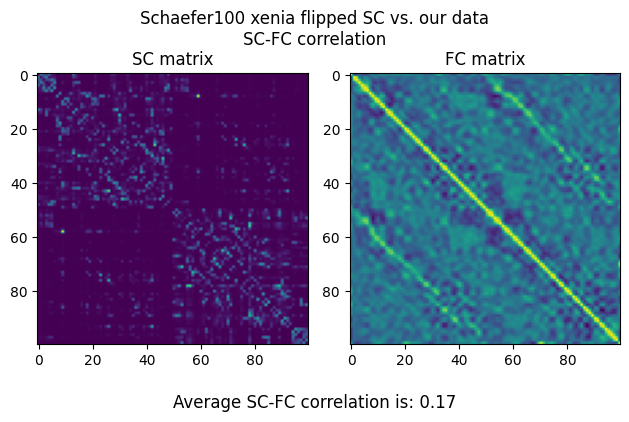

In [121]:
plot_sc_fc(sc_x_schaefer100, avg_fc_100, "Schaefer100 xenia flipped SC vs. our data")

In [114]:
def plot_fc_fc(fc1, fc2, between_what):
    fig = plt.figure()
    plt.subplot(121)
    plt.title('FC matrix 1')
    plt.imshow(fc1)
    plt.subplot(122)
    plt.title('FC matrix 2')
    plt.imshow(fc2)
    fig.suptitle(f'FC-FC correlation {between_what}')
    fig.tight_layout()
    fig.subplots_adjust(top=1.1)
    txt=f"Average FC-FC correlation is: {round(func.matrix_correlation(fc1, fc2), 3)}"
    plt.figtext(0.5, 0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

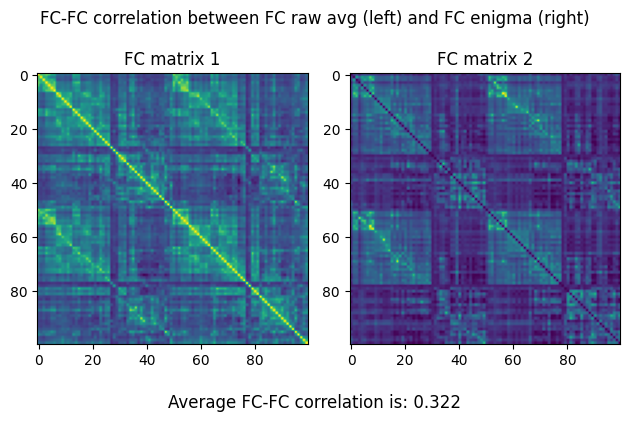

In [122]:
all_hc_fmri_raw = {sub: ts for sub, ts in all_fMRI_raw.items() if sub in HC}
fcs = []
for ts in all_hc_fmri_raw.values():
    fcs.append(func.fc(ts))
fc_raw_avg = np.array(fcs).mean(axis=0)
plot_fc_fc(fc_raw_avg, fc_enigma_100, "between FC raw avg (left) and FC enigma (right)")

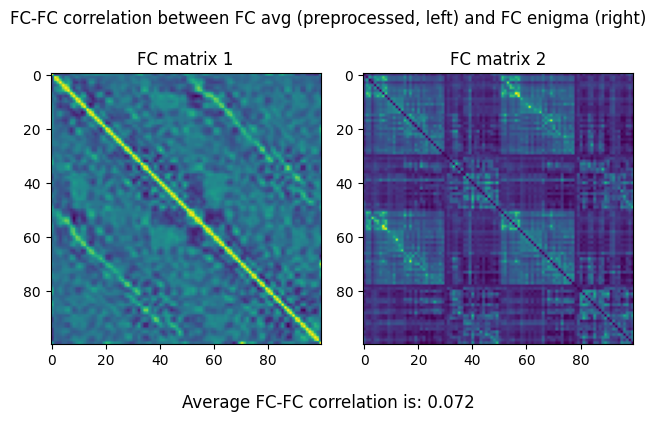

In [124]:
all_hc_fmri = {sub: ts for sub, ts in all_fMRI.items() if sub in HC}
fcs = []
for ts in all_hc_fmri.values():
    fcs.append(func.fc(ts))
fc_avg = np.array(fcs).mean(axis=0)
plot_fc_fc(fc_avg, fc_enigma_100, "between FC avg (preprocessed, left) and FC enigma (right)")

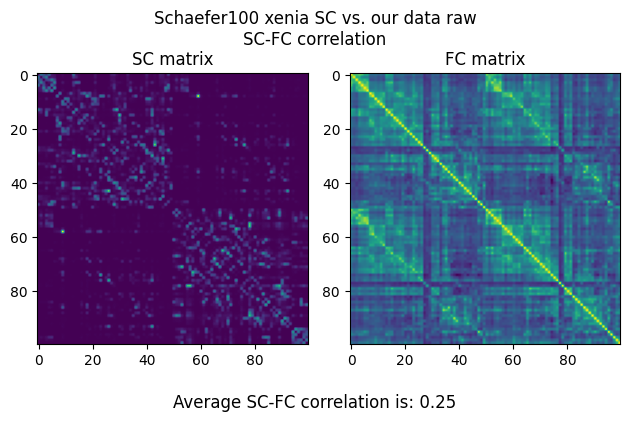

In [119]:
plot_sc_fc(sc_x_schaefer100, fc_raw_avg, "Schaefer100 xenia SC vs. our data raw")

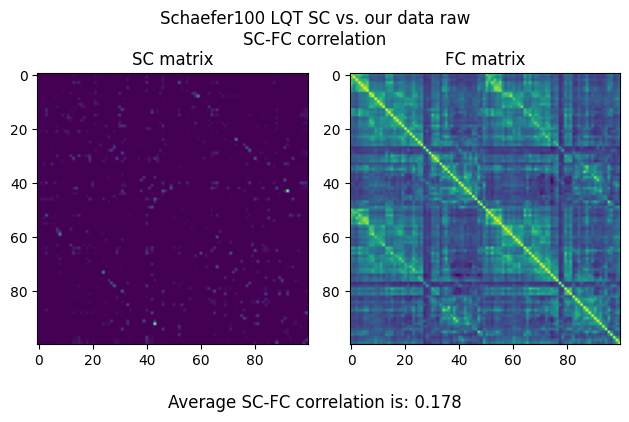

In [120]:
plot_sc_fc(lqt_sc_100, fc_raw_avg, "Schaefer100 LQT SC vs. our data raw")

In [127]:
all_hc_fmri_no_filter = {}
fcs_no_filt = []
for sub, ts in all_hc_fmri_raw.items(): 
    ts_c = clean(ts,
        detrend=True,
        standardize="zscore",
        filter=False,
        t_r=3.0,
    )
    fcs_no_filt.append(func.fc(ts_c))

fc_no_filter = np.array(fcs_no_filt).mean(axis = 0)

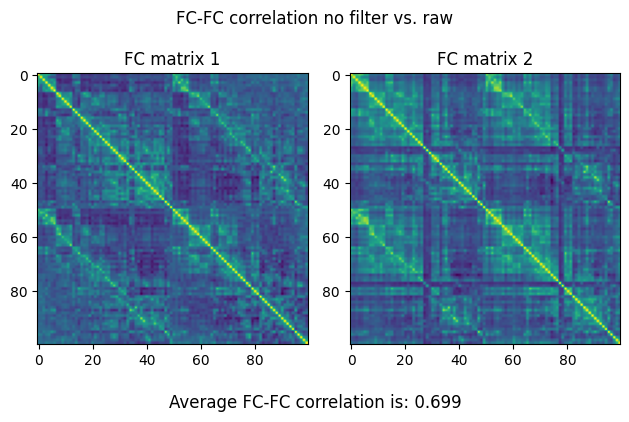

In [128]:
plot_fc_fc(fc_no_filter, fc_raw_avg, "no filter vs. raw")

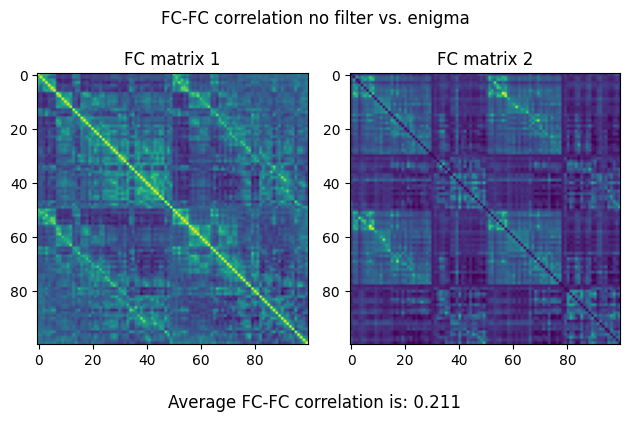

In [134]:
all_hc_fmri_no_filter = {}
fcs_no_filt = []
for sub, ts in all_hc_fmri_raw.items(): 
    ts_c = clean(ts,
        detrend=True,
        standardize=False,
        filter=False,
        t_r=3.0,
    )
    fcs_no_filt.append(func.fc(ts_c))

fc_no_filter_no_detrend = np.array(fcs_no_filt).mean(axis = 0)
plot_fc_fc(fc_no_filter_no_detrend, fc_enigma_100, "no filter vs. enigma")

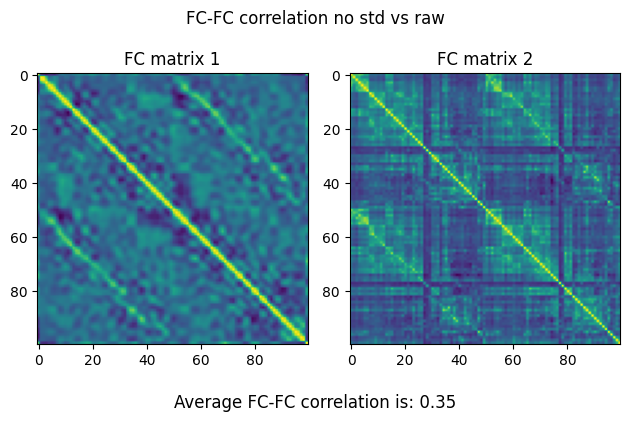

In [144]:
all_hc_fmri_no_filter = {}
fcs_no_filt = []
for sub, ts in all_hc_fmri_raw.items(): 
    ts_c = clean(ts,
        detrend=True,
        standardize='zscore',
        filter="butterworth",
        low_pass=0.08,
        high_pass=0.008,
        t_r=3.0,
    )

    fcs_no_filt.append(func.fc(ts_c))
fcs_no_stand = np.array(fcs_no_filt).mean(axis=0)
plot_fc_fc(fcs_no_stand, fc_raw_avg, "no std vs raw")

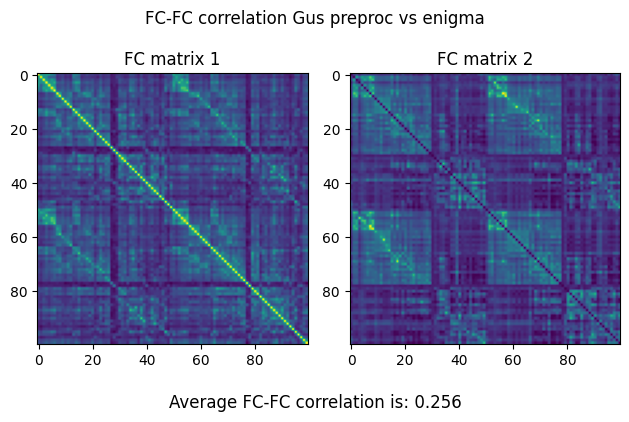

In [154]:
import warnings
import numpy as np
from scipy.signal import butter, detrend, filtfilt
from scipy import signal
import numpy as np
import numpy.matlib as mtlib

def demean(x,dim=0):
    # DEMEAN(X)
    # Removes the Average or mean value.
    #
    # DEMEAN(X,DIM)
    # Removes the mean along the dimension DIM of X.

    # if (dim == -1):
    #     dim = 0
    #     if (x.shape[0] > 1):
    #         dim = 0;
    #     elif (x.shape[1] > 1):
    #         dim = 1;

    dims = x.size
    # dimsize = x.shape[dim]
    # dimrep = np.ones(1,len(dims));
    # dimrep[dim] = dimsize;

    return x - mtlib.tile(np.mean(x,dim), dims)  # repmat(np.mean(x,dim),dimrep)
# -----------------------------------------------------
TR = 3.                           # sampling interval
k = 2                             # 2nd order butterworth filter
flp = 0.12                         # lowpass frequency of filter
fhi = 0.13      
def BandPassFilter(boldSignal, removeStrongArtefacts=True):
    # Convenience method to apply a filter (always the same one) to all areas in a BOLD signal. For a single,
    # isolated area evaluation, better use the method below.
    (N, Tmax) = boldSignal.shape
    fnq = 1./(2.*TR)              # Nyquist frequency
    Wn = [flp/fnq, fhi/fnq]                                   # butterworth bandpass non-dimensional frequency
    bfilt, afilt = butter(k,Wn, btype='band', analog=False)   # construct the filter
    # bfilt = bfilt_afilt[0]; afilt = bfilt_afilt[1]  # numba doesn't like unpacking...
    signal_filt = np.zeros(boldSignal.shape)
    for seed in range(N):
        if not np.isnan(boldSignal[seed, :]).any():  # No problems, go ahead!!!
            ts = demean(detrend(boldSignal[seed, :]))  # Probably, we do not need to demean here, detrend already does the job...

            if removeStrongArtefacts:
                ts[ts>3.*np.std(ts)] = 3.*np.std(ts)    # Remove strong artefacts
                ts[ts<-3.*np.std(ts)] = -3.*np.std(ts)  # Remove strong artefacts

            signal_filt[seed,:] = filtfilt(bfilt, afilt, ts, padlen=3*(max(len(bfilt),len(afilt))-1))  # Band pass filter. padlen modified to get the same result as in Matlab
        else:  # We've found problems, mark this region as "problematic", to say the least...
            warnings.warn(f'############ Warning!!! BandPassFilter: NAN found at region {seed} ############')
            signal_filt[seed,0] = np.nan
    return signal_filt

all_hc_fmri_no_filter = {}
fcs_no_filt = []
for sub, ts in all_hc_fmri_raw.items(): 
    ts_c = BandPassFilter(ts)
    fcs_no_filt.append(func.fc(ts_c))
fcs_no_stand = np.array(fcs_no_filt).mean(axis=0)
plot_fc_fc(fcs_no_stand, fc_enigma_100, "Gus preproc vs enigma")